In [1]:
import tensorflow as tf
img_dir = "C:/Users/Kacper/Desktop/github/OneFish-Disseration-Project/Model/img"
# Define image size and number of classes
IMG_SIZE = 224
NUM_CLASSES = 30
batch_size = 32

# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    validation_split=0.2,
    subset="training",
    seed =123,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size= batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=batch_size)

Found 7482 files belonging to 30 classes.
Using 5986 files for training.
Found 7482 files belonging to 30 classes.
Using 1496 files for validation.


In [2]:
# Preprocess the data
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))


In [4]:
# Build the model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights="imagenet",
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

# Train the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [5]:
import numpy as np
import cv2
import os
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Epoch 1/20


c:\Users\Kacper\.conda\envs\tfgpu\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


188/188 [==============================] - 24s 103ms/step - loss: 2.1044 - accuracy: 0.4081 - val_loss: 1.6298 - val_accuracy: 0.5247
Epoch 2/20
188/188 [==============================] - 20s 104ms/step - loss: 1.3184 - accuracy: 0.6046 - val_loss: 1.3612 - val_accuracy: 0.5922
Epoch 3/20
188/188 [==============================] - 20s 104ms/step - loss: 1.1260 - accuracy: 0.6656 - val_loss: 1.2748 - val_accuracy: 0.6230
Epoch 4/20
188/188 [==============================] - 20s 106ms/step - loss: 1.0050 - accuracy: 0.6943 - val_loss: 1.2645 - val_accuracy: 0.6130
Epoch 5/20
188/188 [==============================] - 20s 107ms/step - loss: 0.9670 - accuracy: 0.7035 - val_loss: 1.2054 - val_accuracy: 0.6397
Epoch 6/20
188/188 [==============================] - 20s 106ms/step - loss: 0.8989 - accuracy: 0.7224 - val_loss: 1.1682 - val_accuracy: 0.6430
Epoch 7/20
188/188 [==============================] - 20s 107ms/step - loss: 0.8514 - accuracy: 0.7294 - val_loss: 1.1735 - val_accuracy: 0.6

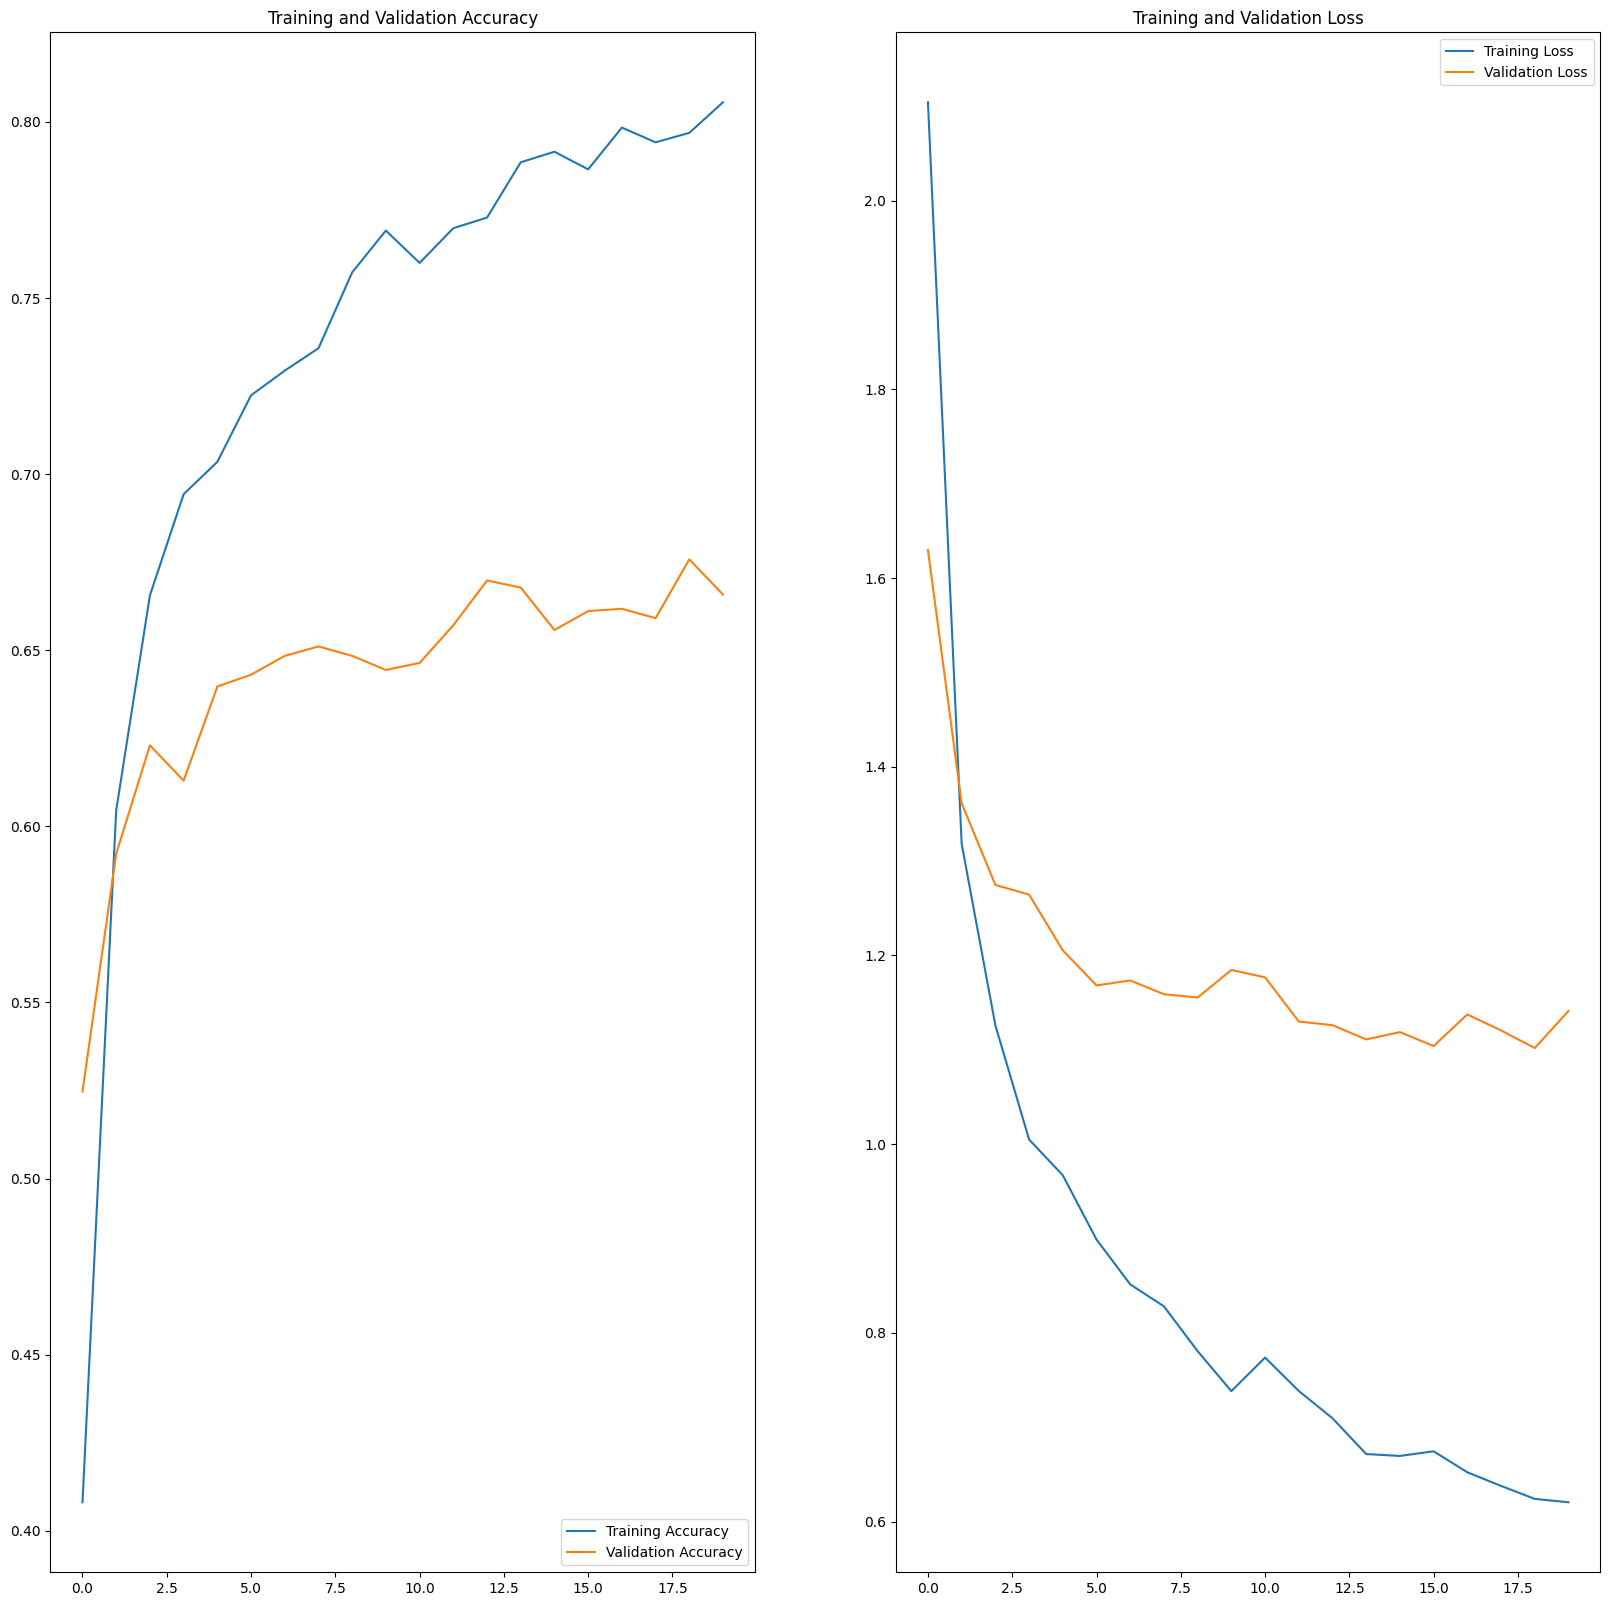

In [6]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save("modelt.hdf5")

<h1>Other Model <h1>